In [1]:
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline


In [2]:
import os
print(os.listdir("C:\\Users\\sam\\Desktop\\Project2021\\Gans"))

['.ipynb_checkpoints', 'cell_images', 'Gans.ipynb', 'Gan_output']


In [3]:
import cv2
import seaborn as sns
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\sam\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sam\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sam\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sam\Anaconda3\env

In [4]:
parasitized_data = os.listdir('C:/Users/sam/Desktop/Project2021/Gans/cell_images/Parasitized/')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('C:/Users/sam/Desktop/Project2021/Gans/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C118P79ThinF_IMG_20151002_110609_cell_1.png', 'C118P79ThinF_IMG_20151002_110609_cell_10.png', 'C118P79ThinF_IMG_20151002_110609_cell_11.png', 'C118P79ThinF_IMG_20151002_110609_cell_12.png', 'C118P79ThinF_IMG_20151002_110609_cell_13.png', 'C118P79ThinF_IMG_20151002_110609_cell_14.png', 'C118P79ThinF_IMG_20151002_110609_cell_15.png', 'C118P79ThinF_IMG_20151002_110609_cell_16.png', 'C118P79ThinF_IMG_20151002_110609_cell_17.png', 'C118P79ThinF_IMG_20151002_110609_cell_18.png']


['C152P113ThinF_IMG_20151115_124217_cell_145.png', 'C152P113ThinF_IMG_20151115_124217_cell_158.png', 'C152P113ThinF_IMG_20151115_124323_cell_135.png', 'C152P113ThinF_IMG_20151115_124323_cell_145.png', 'C152P113ThinF_IMG_20151115_124323_cell_157.png', 'C152P113ThinF_IMG_20151115_124323_cell_158.png', 'C152P113ThinF_IMG_20151115_124323_cell_159.png', 'C152P113ThinF_IMG_20151115_124323_cell_20.png', 'C152P113ThinF_IMG_20151115_124323_cell_28.png', 'C152P113ThinF_IMG_20151115_124323_cell_40.png']


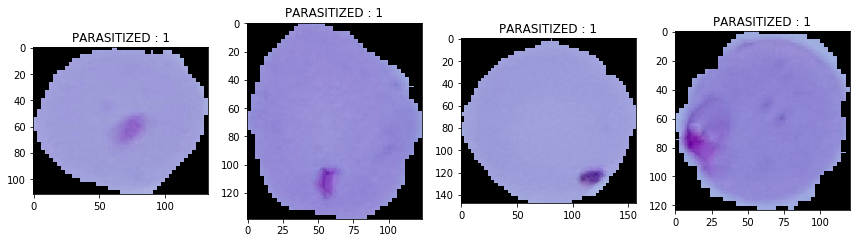

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:/Users/sam/Desktop/Project2021/Gans/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

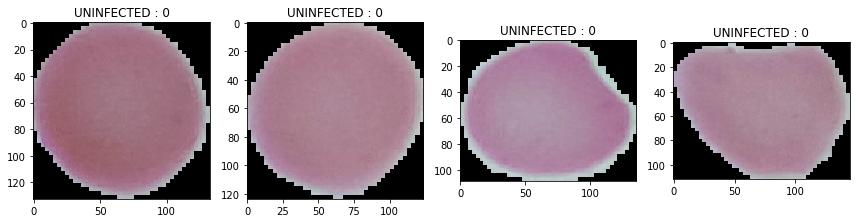

In [6]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:/Users/sam/Desktop/Project2021/Gans/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [7]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('C:/Users/sam/Desktop/Project2021/Gans/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (240, 240))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('C:/Users/sam/Desktop/Project2021/Gans/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (240, 240))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None


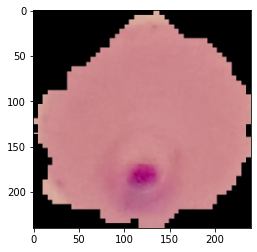

In [8]:
plt.imshow(data[9])
plt.show()

In [9]:
image_data = np.array(data)
labels = np.array(labels)
x_train=image_data.astype('float32')


In [10]:
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU

In [11]:
generator= Sequential([
        Dense(128*60*60, input_dim=100, activation=LeakyReLU(0.2)),
        BatchNormalization(),
        Reshape((60,60,128)),
        UpSampling2D(),
    Convolution2D(128,5,5, border_mode='same', activation=LeakyReLU(0.2)),
    BatchNormalization(),
    Convolution2D(56,3,3, border_mode='same', activation=LeakyReLU(0.2)),
    BatchNormalization(),
    UpSampling2D(),
    Convolution2D(3,5,5, border_mode='same', activation='tanh'),
     
    
])

generator.summary()

C:\Users\sam\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
C:\Users\sam\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), activation=<keras.lay..., padding="same")`
  
C:\Users\sam\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(56, (3, 3), activation=<keras.lay..., padding="same")`
  
C:\Users\sam\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (5, 5), activation="tanh", padding="same")`
  # This is added back by InteractiveShellApp.in

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 460800)            46540800  
_________________________________________________________________
batch_normalization_1 (Batch (None, 460800)            1843200   
_________________________________________________________________
reshape_1 (Reshape)          (None, 60, 60, 128)       0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 120, 120, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 128)     409728    
_________________________________________________________________
batch_normalization_2 (Batch (None, 120, 120, 128)     512       
_________________________________________________________________
conv

In [12]:
discriminator=Sequential([
    Convolution2D(124,5,5, subsample=(2,2), input_shape=(240,240,3), border_mode='same', activation=LeakyReLU(0.2)),
    Dropout(0.4),
    Convolution2D(124,5,5, subsample=(2,2), border_mode='same', activation=LeakyReLU(0.2)),
    Dropout(0.4),
    Flatten(),
    Dense(1, activation='sigmoid')
    
])

discriminator.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 120, 120, 124)     9424      
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 120, 124)     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 124)       384524    
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60, 124)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 446400)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 446401    
Total params: 840,349
Train

C:\Users\sam\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(124, (5, 5), input_shape=(240, 240,..., activation=<keras.lay..., strides=(2, 2), padding="same")`
  
C:\Users\sam\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(124, (5, 5), activation=<keras.lay..., strides=(2, 2), padding="same")`
  after removing the cwd from sys.path.


In [13]:
from keras.optimizers import Adam
adam=Adam(lr=0.0001, beta_1=0.5)

discriminator.trainable=True
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

In [14]:
generator.compile(loss='binary_crossentropy', optimizer=adam)
ganInput= Input(shape=(100,))
x=generator(ganInput)
discriminator.trainable= False
ganOutput= discriminator(x)

gan= Model(input=ganInput, output=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)


C:\Users\sam\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  import sys


In [15]:
def train(num_epoch, batch_size):
    batch_count= x_train.shape[0] //batch_size
    print("Batch count: {}".format(batch_count))
    
    for epoch in range(num_epoch):
        print("Epoch: {}".format(epoch))
    
    for batch in range(batch_count):
        noise_input=np.random.rand(batch_size, 100)
        fake_images=generator.predict(noise_input, batch_size=batch_size)
        
        image_batch=x_train[np.random.randint(0,x_train.shape[0], size=batch_size)]
        
        images= np.concatenate([fake_images, image_batch])
        
        labels=[0.95]*batch_size+[0.05]*batch_size
        
        discriminator.trainable=True
        
        d=discriminator.fit(images, labels, verbose=0)
        
        y_generator= [0.05]*batch_size
        discriminator.trainable=False
        g= gan.fit(noise_input, y_generator, verbose=0)
        input_g=np.random.rand(1,100)
        preds=(generator.predict(input_g)+1.0/2.0)
        
        if epoch%10 == 0:
            for pred in range(preds.shape[0]):
                plt.imshow(preds[pred])
                if epoch%30==0:
                    plt.savefig('Gan_output/epoch{}.png'.format(str(epoch)), dpi=250)
            plt.show()
                    
        

In [ ]:
train(50, 32)


Batch count: 25
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
